In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import scale, minmax_scale, robust_scale
from scipy import stats
import statsmodels.api as sm
from statsmodels.stats.proportion import proportions_ztest
import scipy

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [4]:
# 회귀분석
from statsmodels.formula.api import ols
# qqplot, 회귀분석의 상수항 추가
from statsmodels.api import qqplot, add_constant
# 선형 모델 formula
import statsmodels.formula.api as smf
# 평가함수
from statsmodels.tools.eval_measures import rmse
# 그래프 자동 출력 옵션
# 다중공선성 확인
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 선형 회귀 모형
from sklearn.linear_model import LinearRegression
# 변수 선택법(후진제거법)
from sklearn.feature_selection import RFE
# Scale 변환 -> 표준화 회귀계수 산출
from sklearn.preprocessing import StandardScaler

# 1. Load Data

In [8]:
df_raw = pd.read_csv("./data/total.csv")
df_raw.drop('Unnamed: 0', axis=1, inplace=True)

In [9]:
df_raw.head()

,Date,roam,g_confirmed,g_deaths,g_recovered,g_dayconfirmed,g_daydeaths,g_dayrecovered,k_confirmed,k_deaths,k_recoverd,k_dayconfirmed,k_day_osi_1,oversea_inflow,day_osi
0,2020-01-23,21559,654,18,30,99.0,1.0,2.0,1,0,0,0.0,1,1.0,NaN
1,2020-01-26,26214,2118,56,52,684.0,14.0,13.0,3,0,0,1.0,1,3.0,2.0
2,2020-01-27,32114,2927,82,61,809.0,26.0,9.0,4,0,0,1.0,1,4.0,1.0
3,2020-01-30,20240,8234,171,143,2068.0,38.0,17.0,4,0,0,0.0,2,6.0,2.0
4,2020-01-31,21728,9927,213,222,1693.0,42.0,79.0,11,0,0,7.0,1,7.0,1.0


# 2. Correlation Analysis

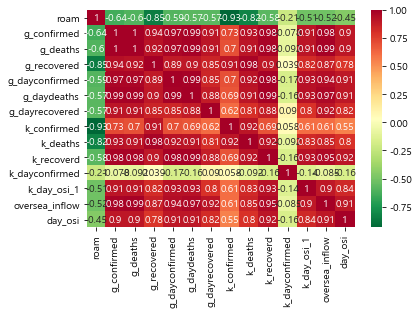

In [11]:
sns.heatmap(df_raw.corr(),annot = True, cmap="RdYlGn_r")
plt.show()

In [12]:
# 상관관계 분석
df_raw.corr().round(3)

,roam,g_confirmed,g_deaths,g_recovered,g_dayconfirmed,g_daydeaths,g_dayrecovered,k_confirmed,k_deaths,k_recoverd,k_dayconfirmed,k_day_osi_1,oversea_inflow,day_osi
roam,1.000,-0.637,-0.600,-0.847,-0.587,-0.573,-0.572,-0.933,-0.816,-0.577,-0.208,-0.514,-0.518,-0.454
g_confirmed,-0.637,1.000,0.998,0.935,0.974,0.988,0.913,0.728,0.930,0.981,-0.078,0.914,0.981,0.902
g_deaths,-0.600,0.998,1.000,0.920,0.971,0.989,0.914,0.698,0.913,0.980,-0.092,0.914,0.988,0.904
g_recovered,-0.847,0.935,0.920,1.000,0.894,0.900,0.850,0.915,0.983,0.896,0.039,0.821,0.869,0.785
g_dayconfirmed,-0.587,0.974,0.971,0.894,1.000,0.992,0.845,0.702,0.920,0.985,-0.169,0.926,0.943,0.908
g_daydeaths,-0.573,0.988,0.989,0.900,0.992,1.000,0.883,0.686,0.913,0.986,-0.155,0.929,0.969,0.905
g_dayrecovered,-0.572,0.913,0.914,0.850,0.845,0.883,1.000,0.620,0.810,0.878,0.090,0.801,0.916,0.819
k_confirmed,-0.933,0.728,0.698,0.915,0.702,0.686,0.620,1.000,0.916,0.692,0.058,0.614,0.613,0.553
k_deaths,-0.816,0.930,0.913,0.983,0.920,0.913,0.810,0.916,1.000,0.918,-0.092,0.834,0.852,0.801
k_recoverd,-0.577,0.981,0.980,0.896,0.985,0.986,0.878,0.692,0.918,1.000,-0.162,0.927,0.955,0.915


# 3. Create Regression Baseline Model

In [13]:
df_raw.columns

Index(['Date', 'roam', 'g_confirmed', 'g_deaths', 'g_recovered',
       'g_dayconfirmed', 'g_daydeaths', 'g_dayrecovered', 'k_confirmed',
       'k_deaths', 'k_recoverd', 'k_dayconfirmed', 'k_day_osi_1',
       'oversea_inflow', 'day_osi'],
      dtype='object')

In [14]:
df = df_raw.set_index('Date')

In [17]:
df_cols = list(df.columns); df_cols

['roam',
 'g_confirmed',
 'g_deaths',
 'g_recovered',
 'g_dayconfirmed',
 'g_daydeaths',
 'g_dayrecovered',
 'k_confirmed',
 'k_deaths',
 'k_recoverd',
 'k_dayconfirmed',
 'k_day_osi_1',
 'oversea_inflow',
 'day_osi']

In [27]:
x_list = df_cols[:-2]
x_cols = ""
for i in range(len(x_list)):
    if i == len(x_list)-1:
        x_cols += str(x_list[i])
    else:
        x_cols += str(x_list[i]) + '+'
    
x_cols

'roam+g_confirmed+g_deaths+g_recovered+g_dayconfirmed+g_daydeaths+g_dayrecovered+k_confirmed+k_deaths+k_recoverd+k_dayconfirmed+k_day_osi_1'

In [28]:
# 선형회귀분석

reg_model = smf.ols(formula = 'day_osi ~ {}'.format(x_cols), data = df)

In [29]:
# 적합 
reg_result = reg_model.fit()
print(reg_result.summary())

                            OLS Regression Results                            
Dep. Variable:                day_osi   R-squared:                       0.876
Model:                            OLS   Adj. R-squared:                  0.826
Method:                 Least Squares   F-statistic:                     17.61
Date:                Tue, 28 Apr 2020   Prob (F-statistic):           2.19e-10
Time:                        18:11:11   Log-Likelihood:                -141.45
No. Observations:                  43   AIC:                             308.9
Df Residuals:                      30   BIC:                             331.8
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         -4.8972     16.263     -0.

# 4. Feature selection

In [32]:
# 설명변수들 간의 다중공선성 확인
df_x = df.drop("day_osi", axis = 1)
# statsmodels의 상수항 추가 함수 적용
df_x_const = add_constant(df_x)
# DataFrame으로 저장
df_vif = pd.DataFrame()
df_vif['variable'] = df_x_const.columns
df_vif['VIF'] = [variance_inflation_factor(df_x_const.values,i) for i in range(df_x_const.shape[1])]
# VIF 정렬
df_vif.sort_values("VIF", inplace = True)
df_vif.round(3)

,variable,VIF
11,k_dayconfirmed,3.763
12,k_day_osi_1,8.676
7,g_dayrecovered,15.369
1,roam,20.972
10,k_recoverd,131.567
8,k_confirmed,168.360
0,const,176.781
5,g_dayconfirmed,415.598
4,g_recovered,421.629
9,k_deaths,475.366
